In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

#LOAD MOVIES
movies_df = pd.read_csv("./ml-20m/movies.csv")

In [7]:
#### Extract Year From Title and Create a new COL 'year'
movies_df['year'] = movies_df['title'].str[-5:]
movies_df['year'] = movies_df['year'].str[:4]
movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')

In [8]:
#LOAD RATINGS
ratings_df = pd.read_csv("./ml-20m/ratings.csv")
#MERGE RATINGS WITH MOVIES
ratings_movies_df = ratings_df.merge(movies_df, how='left', on='movieId')
ratings_movies_df=ratings_movies_df.dropna() #drop na
ratings_movies_df['year']=ratings_movies_df['year'].astype(np.int64)

In [9]:
#CREATE GROUPBY 'YEAR', AGGREGATE count & mean of 'RATING'
ratings_movies_pivot = ratings_movies_df.groupby(['year']).agg({'rating':['count', 'mean']})
ratings_movies_pivot = ratings_movies_pivot.reset_index()
#display(ratings_movies_pivot.head(10))
#display(ratings_movies_pivot.info())

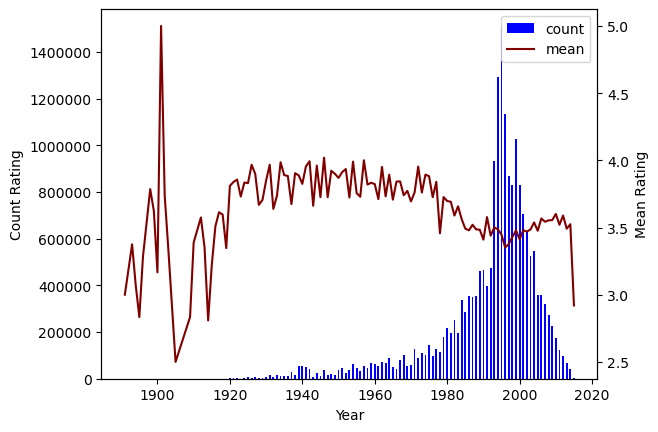

In [10]:
#CREATE FIRST Y AXIS 'COUNT OF RATING'
fig, ax1 = plt.subplots()
fig1 = plt.bar(ratings_movies_pivot['year'], ratings_movies_pivot['rating']['count'], color ='blue', width=0.5,
       label='count')
ax1.set_ylabel('Count Rating')
ax1.set_xlabel('Year')

#RESET Y AXIS FORMAT
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax1.yaxis.set_major_formatter(formatter)

#CREATE SECOND Y AXIS 'MEAN OF RATING'
ax2 = ax1.twinx()
fig2 = plt.plot(ratings_movies_pivot['year'], ratings_movies_pivot['rating']['mean'], color ='maroon',
        label='mean')
ax2.set_ylabel('Mean Rating')

#MERGING LEGENDS TOGETHER INTO 1
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.show()

#Huge spike of count or rating towards the year 2000

#Mean of rating is not moving too much over time,
#the more the count of rating the more even out the mean

#In the beginning of the years (1900-1920), there is not so much data#
#causing high degree of range in the mean of rating